# 回帰問題での評価指標

## RMSE(Root Mean Squared Error)

二条平均平方根誤差という．定義式は，
$$
RMSE=\sqrt{\dfrac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2}\\
データ数：n　真値：y_1,\cdots,y_n　予測値：\hat{y_1},\cdots,\hat{y_n}\\
$$
＜特性＞
- 元のデータを同じ単位を持つ
- 値が0に近いほど精度が高い
- RMSEを損失関数としたときの最小化は最小二乗法と等しい
- 誤差分布が正規分布であるとき最尤推定に用いたい(外れ値の影響が大きい)

## MAE(Mean Absolute Error)

平均絶対誤差という.  
定義式
$$
MAE = \dfrac{1}{n}\sum_{i=1}^n{|y_i - \hat{y_i}|}
$$
＜特性＞
- RMSEよりも，データに対するロバスト性が高い(外れ値に影響されにくい)
- 平均値は外れ値に影響されるが，中央値は外れ値に対して頑健
- 誤差がラプラス分布に従うときの最尤推定に用いたい
- RMSEとの比を考えることによっても，モデルの評価を行うことができる  
良いモデル＝正規分布に従うようなノイズのみが誤差として残ると考えたとき，  
RMSE/MAE ≒ 1.253 となるはず  
※ただし，次のようなとき注意が必要
    * 誤差の絶対値が大きい場合
    * 誤差が正規分布に従わないデータを扱う場合
    * データ数が少ない場合

## R<sup>2</sup>

決定係数という．
$$
{R^{2}}( \hat{y} ) := 1 - \frac{ \frac{1}{n} \sum_{i=1}^{n} { ( {y}_i - \hat{y}_{i} ) }^{2} }{ \frac{1}{n} \sum_{i=1}^{n} { ( {y}_i - \bar{y}) }^{2} }\\
平均値：\bar{y}
$$
＜特性＞
- 決定係数は1に近いほどモデルの精度が高いと言える
- 絶対評価が容易
- 第二項の分母は全変動と呼ばれ，データのばらつき具合を表す．分子は残差変動と呼ばれ，回帰モデルと実測値とのズレを表す

## 簡単なデータを使って計算

![a](img\manual_reg.png)

## sklearnを使って計算

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Bostonのデータを使って，モデルの作成と評価を行う
from sklearn.datasets import load_boston
boston = load_boston()

# X:説明変数，y：目的変数
X = boston.data[:, 5]
y = boston.target

(404,) (102,)
(404,) (102,)


Text(0, 0.5, 'MEDV')

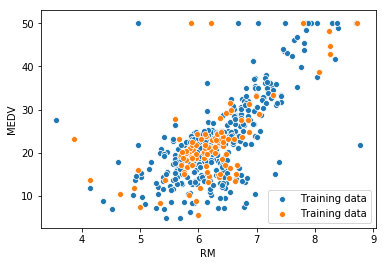

In [3]:
from sklearn.model_selection import train_test_split

# TrainingDataとTestDataに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


# 可視化
sns.scatterplot(X_train, y_train, label='Training data')
sns.scatterplot(X_test, y_test, label='Training data')
plt.xlabel('RM')
plt.ylabel('MEDV')

In [4]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# 学習：未知のパラメータの最適化
linear_regression.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = linear_regression.predict(X_test.reshape(-1,1))
print(f'RMSE: {mean_squared_error(y_test, y_pred)**0.5}')
print(f' MAE: {mean_absolute_error(y_test, y_pred)}')
print(f' R^2: {r2_score(y_test, y_pred)}')

RMSE: 6.848894190115315
 MAE: 4.324740740011389
 R^2: 0.42394386816456275


In [14]:
# 誤差分布は正規分布に近いか？
print(f'RMSE/MAE: {(mean_squared_error(y_test, y_pred)**0.5)/(mean_absolute_error(y_test, y_pred))}')

RMSE/MAE: 1.5836542816893293


# 参考サイト

- 精度評価指標と回帰モデルの評価　[https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/#rmse](https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/#rmse)

以上